# Integração Python com SQL

In [17]:
#!pip install cx_Oracle

In [1]:
# Importando as bibliotecas
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Montando a string de conexão conn_str = u'user/password@host:port/service'
conn_str = u'mmococa/segredo@srvbackup.mococa.net:1521/ti.mococa.net'

In [3]:
# Conectando ao banco Oralce
conexao = cx_Oracle.connect(conn_str)

# Criando um cursor e executando o sql
c = conexao.cursor()

# Cria o comando
comando = (u"""select turno, 
                    sum(producao), 
                    sum(perda), 
                    (sum(perda)/sum(producao)*100) 
               from apontamento 
               where unidade_produtiva = 'LITOGRAFIA' 
               and   data >= TO_DATE('2021-01-01','YYYY-MM-DD') 
               and   data <= TO_DATE('2021-12-31','YYYY-MM-DD') 
               group by turno""") 

# Executa o comando
c.execute(comando)

df = c.fetchall()
conexao.close()

In [4]:
df1 = pd.DataFrame(df)

In [5]:
display(df1)

,0,1,2,3
0,TURNO 1 SÁBADO,3520509,6360,0.180656
1,TURNO 2 SÁBADO,2125582,4339,0.204132
2,TURNO 2,23502489,52191,0.222066
3,TURNO 1 EXTRA - DIURNO,1551,40,2.578981
4,TURNO 3,25736644,51294,0.199303
5,TURNO 1,22475611,48404,0.215362


# Excluir a linha "TURNO 1 EXTRA - DIURNO" outline
df1 = df1.drop(3) - deleta a linha de index 3.

In [6]:
df1 = df1.drop(3)
display(df1)

,0,1,2,3
0,TURNO 1 SÁBADO,3520509,6360,0.180656
1,TURNO 2 SÁBADO,2125582,4339,0.204132
2,TURNO 2,23023019,51449,0.223468
4,TURNO 3,25233625,50138,0.198695
5,TURNO 1,22010781,47575,0.216144


# Renomeando no título das colunas

In [7]:
df1.rename(columns={'2':'Producao'}, inplace=True)

In [9]:
print(df1[0])


0    TURNO 1 SÁBADO
1    TURNO 2 SÁBADO
2           TURNO 2
4           TURNO 3
5           TURNO 1
Name: 0, dtype: object


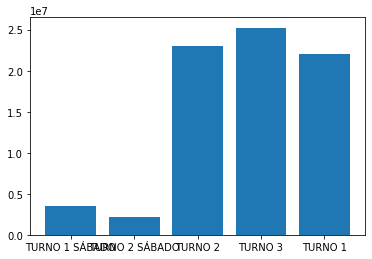

In [101]:
plt.bar(df1[0],df1[1])
plt.show()

In [17]:
df1.corr()

,1,2,3
1,1.000000,0.996875,-0.513043
2,0.996875,1.000000,-0.504807
3,-0.513043,-0.504807,1.000000


<AxesSubplot:>

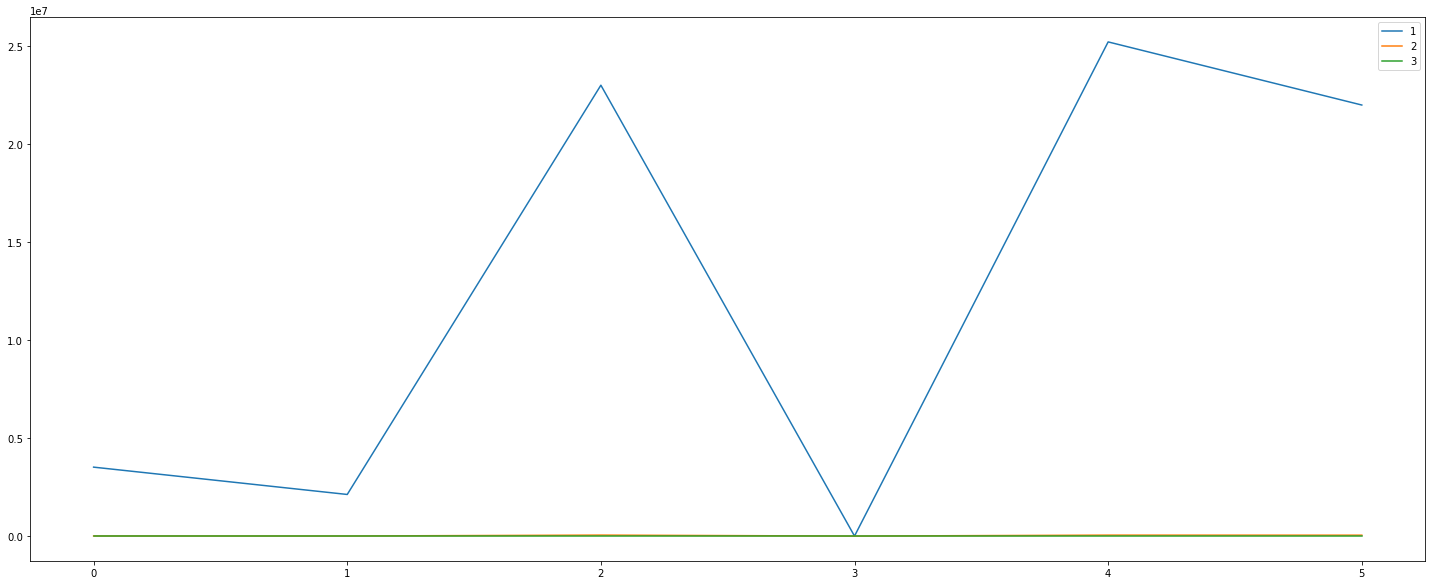

In [16]:
df1.plot(figsize=(25,10))

In [7]:
# Conectando ao banco Oralce
conexao = cx_Oracle.connect(conn_str)

# Criando um cursor e executando o sql
c = conexao.cursor()

# Cria o comando
comando = (u"select operador, sum(perda) from apontamentos where unidade_produtiva = 'LITOGRAFIA' and data >= TO_DATE('2021-10-01','YYYY-MM-DD') group by operador") 

# Executa o comando
c.execute(comando)

df = c.fetchall()
conexao.close()

In [8]:
df1 = pd.DataFrame(df)

<AxesSubplot:>

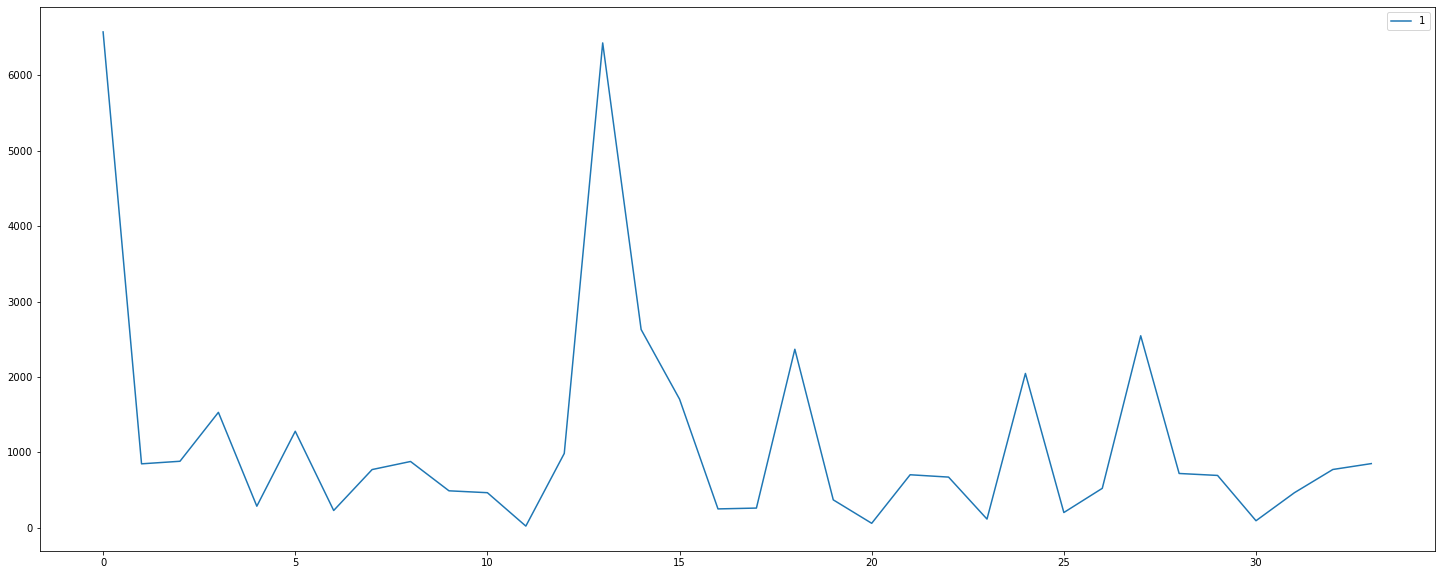

In [9]:
df1.plot(figsize=(25,10))